# Projet 2 - Youtube --Fred--

### Import des modules

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import des données

##### Data

In [76]:
data_fr = pd.read_csv("data/FRvideos.csv")
data_us = pd.read_csv("data/USvideos.csv")

In [46]:
print(data_us.shape)
data_us.head(2)

(40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [47]:
print(data_fr.shape)
data_fr.head(2)

(40724, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...


##### Catégories

In [49]:
cat_fr = pd.read_json("data/FR_category_id.json")
cat_us = pd.read_json("data/US_category_id.json")

##### Mise en listes

In [50]:
dic_cat_fr = {}
for x in range(cat_fr.shape[0]):
    ident = cat_fr.iloc[x,2]["id"]
    title = cat_fr.iloc[x,2]["snippet"]["title"]
    dic_cat_fr[ident] = title
print(dic_cat_fr)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [71]:
l = ['Entertainment', 'Comedy', 'Gaming', 'Sports', 'People & Blogs', 'Education', 'Howto & Style', 'Science & Technology', 'Autos & Vehicles', 'News & Politics', 'Film & Animation', 'Music', 'Shows', 'Travel & Events', 'Pets & Animals', '', 'Movies', 'Trailers']
for x, y in dic_cat_fr.items():
    if y in l:
        pass
    else:
        print(y)

Short Movies
Videoblogging
Anime/Animation
Action/Adventure
Classics
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts


In [51]:
dic_cat_us = {}
for x in range(cat_us.shape[0]):
    ident = cat_us.iloc[x,2]["id"]
    title = cat_us.iloc[x,2]["snippet"]["title"]
    dic_cat_us[ident] = title
print(dic_cat_us)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


### Modifications des data sets

##### Modification d'index

In [52]:
data_fr = data_fr.set_index("video_id")
data_us = data_us.set_index("video_id")

##### Ajout d'une colonne "category"

In [53]:
data_fr["category"] = ""
for x, y in dic_cat_fr.items():
    filtre = data_fr["category_id"] == int(x)
    data_fr["category"][filtre] = y
data_fr.head()

/home/fred/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
video_id,,,,,,,,,,,,,,,,
Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment
Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment
ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,Comedy
WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Gaming
ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Sports


In [54]:
data_us["category"] = ""
for x, y in dic_cat_us.items():
    filtre = data_us["category_id"] == int(x)
    data_us["category"][filtre] = y
data_us.head()

/home/fred/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [73]:
data_fr[data_fr["category_id"] == 39].shape

(0, 16)

In [72]:
data_fr[data_fr["category"] == "Horror"].shape

(0, 16)

## Graphs par catégories

#### Nouveau DataFrame allégé

In [63]:
df = data_fr[["title", "category", "views", "likes", "dislikes", "comment_count"]]

In [58]:
df.tail(2)

,title,category,views,likes,dislikes,comment_count
video_id,,,,,,
NlxE_QQMRzg,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",Film & Animation,78117,244,74,46
_LgKglfnqlc,Mandoumbé ak Koor Gui 2018 Episode 28,Entertainment,46604,947,37,127


### Reduction du jeu de donnéés

##### 200 entrées

In [59]:
df = df.iloc[0:200, :]

In [64]:
df.shape

(40724, 6)

### Views / Catégories

In [66]:
df.category.unique()

array(['Entertainment', 'Comedy', 'Gaming', 'Sports', 'People & Blogs',
       'Education', 'Howto & Style', 'Science & Technology',
       'Autos & Vehicles', 'News & Politics', 'Film & Animation', 'Music',
       'Shows', 'Travel & Events', 'Pets & Animals', '', 'Movies',
       'Trailers'], dtype=object)

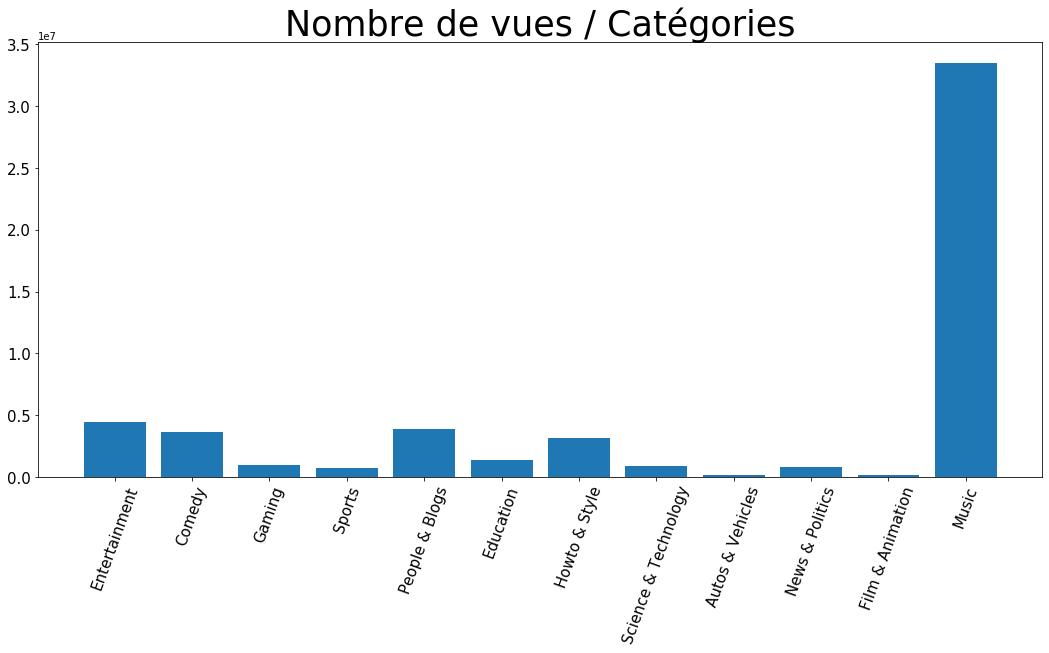

In [62]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["views"])
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)

plt.show()

### Likes / Catégories

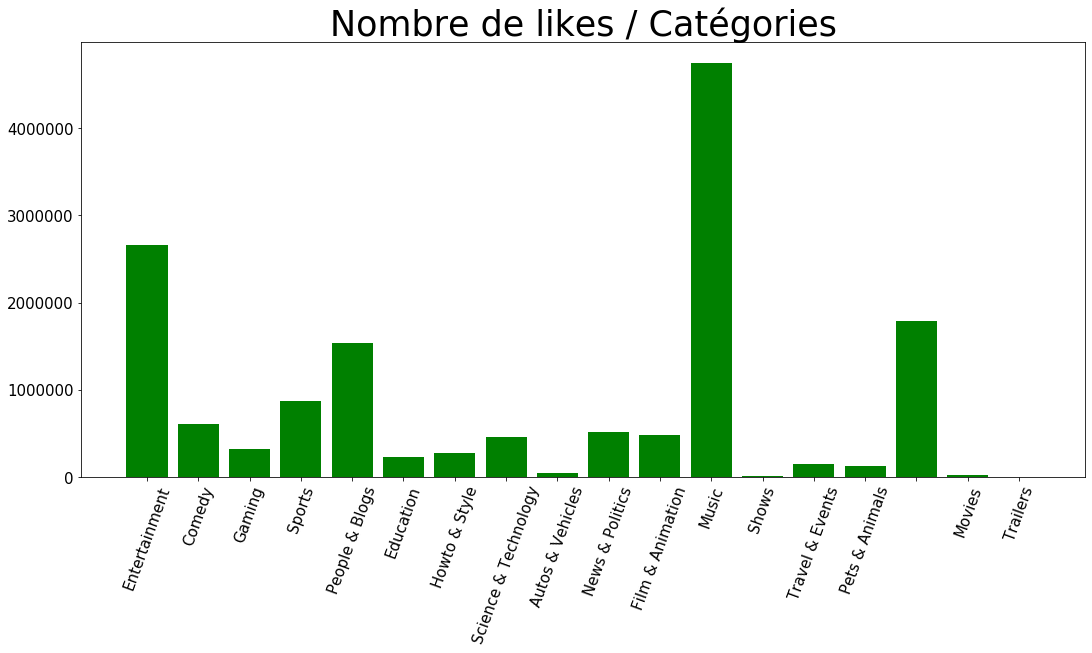

In [21]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["likes"], color="g")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de likes / Catégories", size=35)

plt.show()

### Dislikes / Catégories

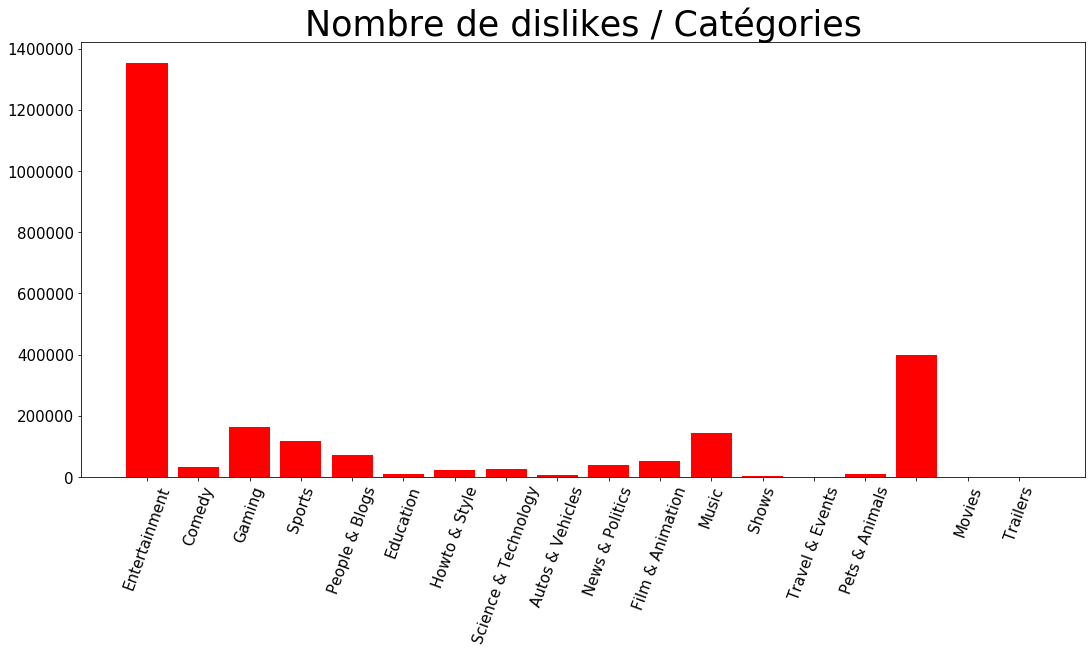

In [22]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["dislikes"], color="r")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de dislikes / Catégories", size=35)

plt.show()

### Comments / Catégories

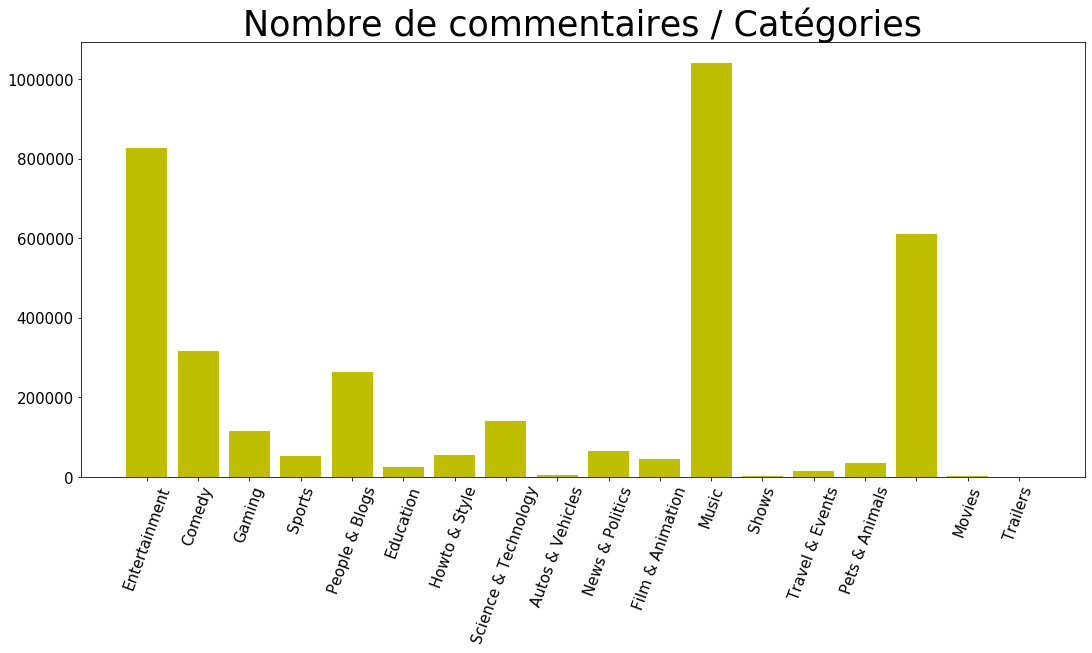

In [23]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["comment_count"], color="y")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de commentaires / Catégories", size=35)

plt.show()

In [24]:
df = df.iloc[0:200, :]

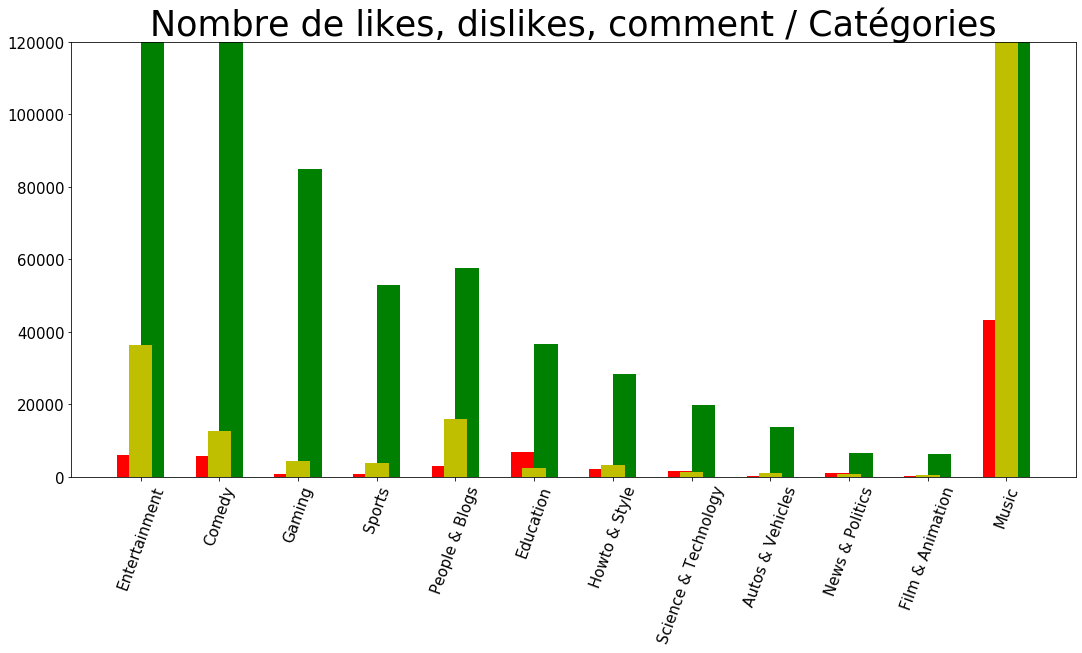

In [25]:
plt.figure(figsize=(18,8))

#plt.bar(df["category"], df["views"])
plt.bar(df["category"], df["likes"], width=0.3, align="edge", color="g")
plt.bar(df["category"], df["dislikes"], width=-0.3, align="edge", color="r")
plt.bar(df["category"], df["comment_count"], width=0.3, align="center", color="y")


plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.ylim(0,120000)

plt.title("Nombre de likes, dislikes, comment / Catégories", size=35)

plt.show()

## Travail sur les mots-clés

### DataFrame allégé

In [26]:
df = data_fr.copy()
#df = df[0:200]
df.shape

(40724, 16)

#### Création d'un dictionnaire de mots-cles

In [27]:
tags = df["tags"].values

In [28]:
def supprime_accent(ligne):
        """ supprime les accents du texte source """
        accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â']
        sans_accent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a']
        i = 0
        while i < len(accent):
            ligne = ligne.replace(accent[i], sans_accent[i])
            i += 1
        return ligne

In [29]:
liste_tags = []
for y in tags:
    y = y.lower()
    result = supprime_accent(y)
    result = result.split('"|"')
    liste_tags.append(result)

In [30]:
dico_tags = {}
for x in liste_tags:
    for x in x:
        if x in dico_tags.keys():
            dico_tags[x] += 1
        else:
            dico_tags[x] = 1

In [31]:
len(dico_tags.keys())

125790

#### Classement du dico

In [32]:
dico_tags_sorted = sorted(dico_tags.items(),key=lambda c:c[1], reverse=True)
dico_tags_sorted

[('[none]', 5304),
 ('humour', 2279),
 ('football', 1433),
 ('2018', 1433),
 ('france', 1374),
 ('video', 1104),
 ('rap', 969),
 ('drole', 888),
 ('tv', 819),
 ('francais', 812),
 ('serie', 761),
 ('paris', 736),
 ('live', 728),
 ('divertissement', 681),
 ('freestyle', 672),
 ('musique', 669),
 ('foot', 650),
 ('2017', 626),
 ('interview', 602),
 ('funny', 589),
 ('senegal', 559),
 ('sketch', 555),
 ('film', 553),
 ('music', 549),
 ('psg', 531),
 ('comedy', 519),
 ('sport', 514),
 ('fr', 511),
 ('maroc', 502),
 ('amour', 500),
 ('johnny hallyday', 499),
 ('top 10', 491),
 ('television', 482),
 ('vlog', 468),
 ('politique', 465),
 ('tuto', 453),
 ('youtube', 450),
 ('news', 449),
 ('replay', 446),
 ('comedie', 444),
 ('highlights', 434),
 ('neymar', 430),
 ('rire', 427),
 ('clip', 420),
 ('theatre', 420),
 ('cinema', 417),
 ('top', 417),
 ('fun', 416),
 ('prank', 415),
 ('zap', 411),
 ('tpmp', 405),
 ('booba', 404),
 ('diy', 387),
 ('macron', 387),
 ('ronaldo', 368),
 ('de', 363),
 ('cl

In [33]:
mot = "humour"
filtre = df["tags"].str.contains(mot)
data_fr[filtre].shape

(2132, 16)

In [34]:
a = data_fr["tags"][data_fr.index == "kn-pu9awJaY"].values
print(a)

['pierre"|"croce"|"pierrecroce"|"power"|"point"|"powerpoint"|"slides"|"slide"|"humour"|"graphiques"|"graphique"|"schéma"|"schémas"|"diapos"|"diapositives"|"diapo"|"diapositive"|"funny"|"marrante"|"drole"|"vidéo"|"vidéos"|"youtubeur"|"lol"|"fun"|"comedie"|"comedy"|"comedien"|"spectacle"|"participation"|"votre"|"vous"|"abonnés']


In [35]:
dico_tags.sort()

AttributeError: 'dict' object has no attribute 'sort'

In [ ]:
for key, val in sorted(dico_tags, key=dico_tags.values()):
    print(key, val)


#sorted(dico_tags.values(), reverse=True)

In [86]:
for i in range(data_fr.shape[0]//40+1):
    fichier = "test/api200-" + str(i) + ".json"
    with open(fichier, "w") as file:
        pass

In [107]:
dic = {}
for i in range(10):
    dic[i] = i**2
dic[5]

25

In [100]:
40949//40+1

1024

In [98]:
1049*40

41960